<a href="https://colab.research.google.com/github/ReVuz/R_programming/blob/main/timeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Visualization

Develop an R program to create a time series plot using real-world data.

(https://www.kaggle.com/datasets/niketchauhan/covid-19-time-series-data)

Plot the time series object  and add a title and label

Customize the plot to show trendlines and seasonal patterns. Discuss the insights gained from the visualization.



Syntax:  objectName <- ts(data, start, end, frequency)

where,

·         data – represents the data vector

·         start – represents the first observation in time series

·         end – represents the last observation in time series

·         frequency – represents number of observations per unit time. For example, frequency=1 for monthly data.

In [ ]:
install.packages("zoo")
install.packages("ggplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


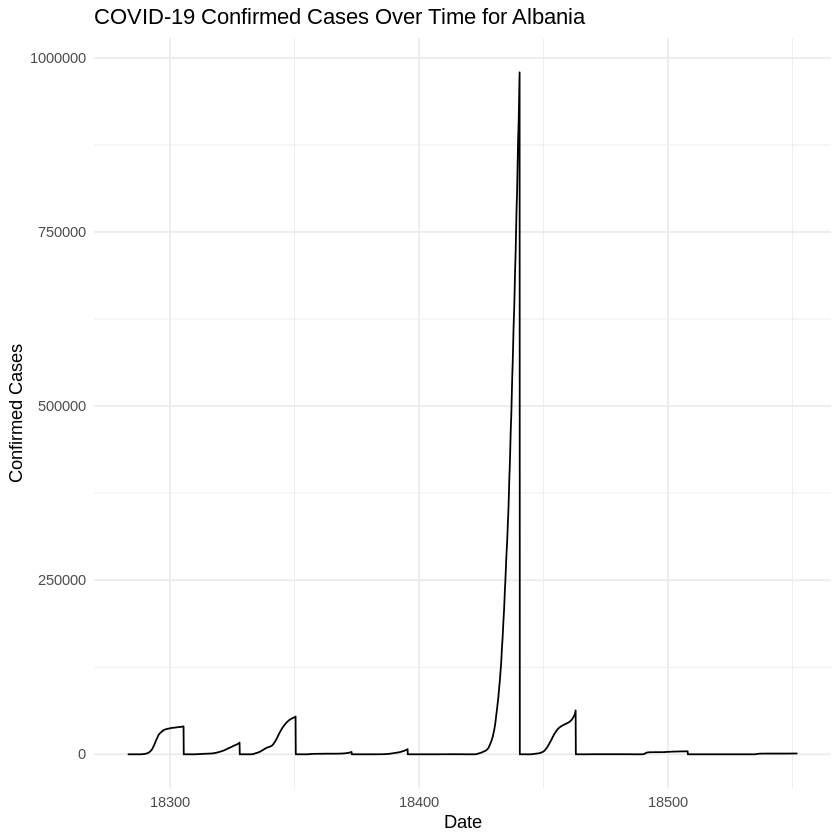

In [ ]:
# Load the required libraries
library(ggplot2)

# Read the COVID-19 dataset (replace 'your_data.csv' with the actual file path)
covid_data <- read.csv("time-series-19-covid-combined.csv")

# Convert the "Date" column to a Date object
covid_data$Date <- as.Date(covid_data$Date)

# Filter data for a specific Country/Region (e.g., "Your Country/Region")
country_data <- covid_data[covid_data$`Country/Region` == "Albania", ]

# Create a time series object for the "Confirmed" cases
covid_ts <- ts(covid_data$Confirmed, start = min(covid_data$Date), end = max(covid_data$Date), frequency = 12)

# Create a data frame for plotting
covid_plot_data <- data.frame(Date = time(covid_ts), Confirmed = as.numeric(covid_ts))

# Create the time series plot
covid_plot <- ggplot(covid_plot_data, aes(x = Date, y = Confirmed)) +
  geom_line() +  # Line plot
  labs(title = "COVID-19 Confirmed Cases Over Time for Albania", x = "Date", y = "Confirmed Cases") +  # Title and labels
  theme_minimal()

# Print the plot
print(covid_plot)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


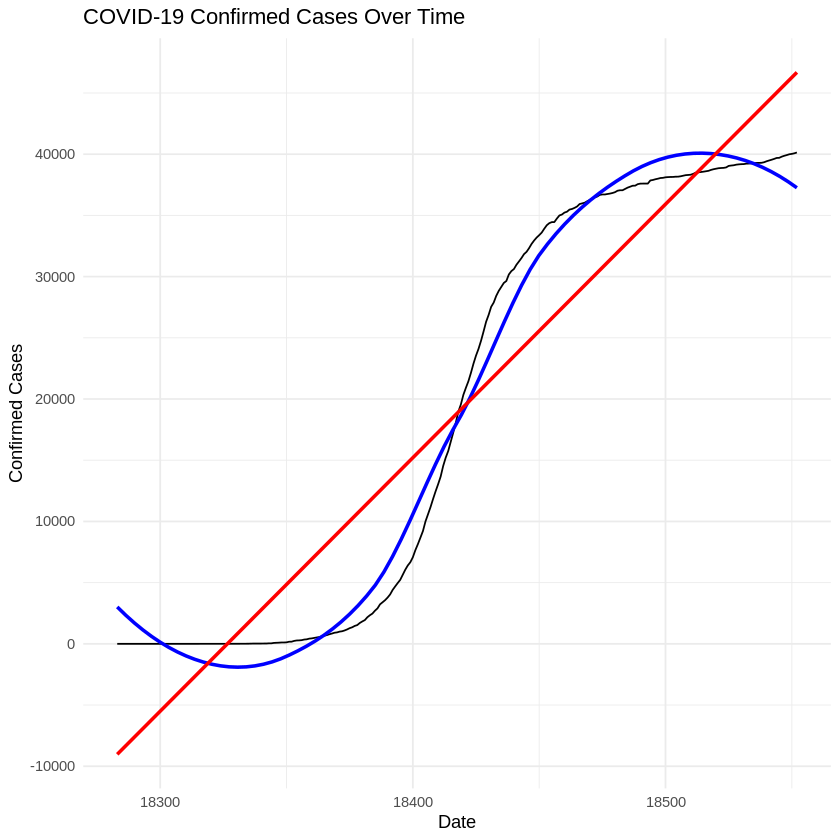

In [ ]:
# Load the required libraries
library(ggplot2)
library(dplyr)

# Load the COVID-19 time series data
covid_data <- read.csv("time-series-19-covid-combined.csv")

# Convert the date column to a Date object
covid_data$Date <- as.Date(covid_data$Date)

# Create a data frame for plotting
covid_plot_data <- data.frame(Date = covid_data$Date, Confirmed = covid_data$Confirmed)

# Calculate a simple moving average to show the trend
window_size <- 7  # You can adjust this to your preference
covid_plot_data$SMA <- zoo::rollmean(covid_plot_data$Confirmed, k = window_size, fill = NA)

# Create the time series plot
covid_plot <- ggplot(covid_plot_data, aes(x = Date, y = Confirmed)) +
  geom_line(aes(y = SMA), color = "blue") +  # Line plot for the moving average
  labs(title = "COVID-19 Confirmed Cases Over Time", x = "Date", y = "Confirmed Cases") +  # Title and labels
  theme_minimal()

# Print the plot
print(covid_plot)


         Length Class  Mode     
x        1884   ts     numeric  
seasonal 1884   ts     numeric  
trend    1884   ts     numeric  
random   1884   ts     numeric  
figure      7   -none- numeric  
type        1   -none- character


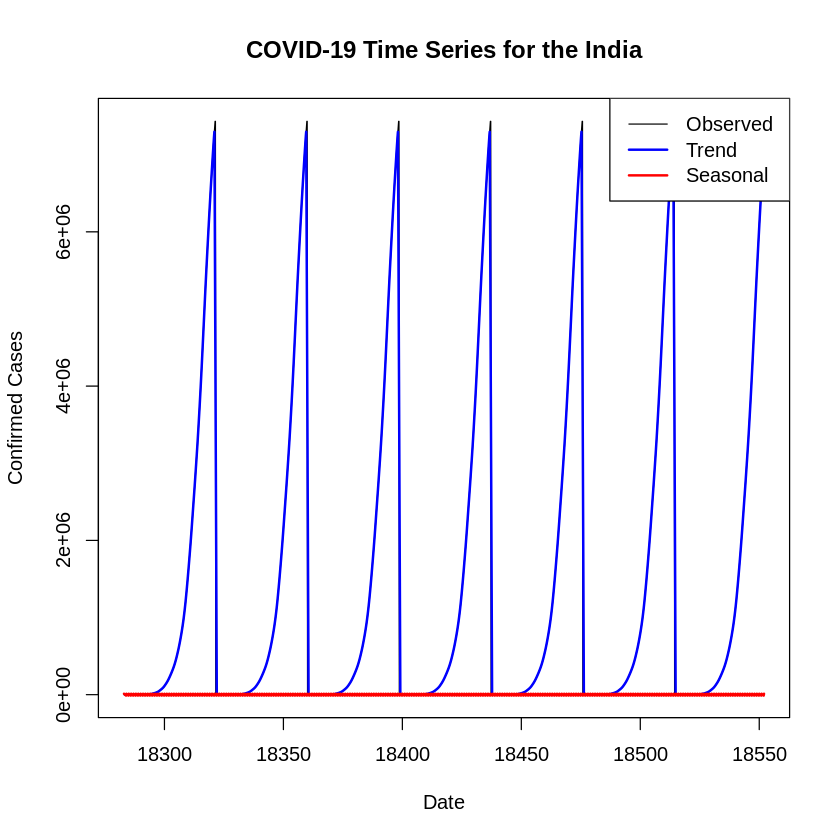

In [ ]:
# Load the required libraries
library(ggplot2)
Covid <- read.csv("time-series-19-covid-combined.csv")
Covid$Date <- as.Date(Covid$Date)
Filtered <- Covid[Covid$Country.Region == "India", ]
TimeSeries <- ts(Filtered$Confirmed, start = min(Filtered$Date),
end = max(Filtered$Date), frequency = 7)
DecomposedTimeSeries <- decompose(TimeSeries)
plot(TimeSeries, main = "COVID-19 Time Series for the India",
ylab = "Confirmed Cases", xlab = "Date")
lines(DecomposedTimeSeries$trend, col = "blue", lwd = 2)
lines(DecomposedTimeSeries$seasonal, col = "red", lwd = 2)
legend("topright", legend = c("Observed", "Trend", "Seasonal"),
       col = c("black", "blue", "red"), lty = c(1, 1, 1), lwd = c(1, 2, 2))
print(summary(DecomposedTimeSeries))